In [48]:
import pandas as pd

# Step 1 Load Data
data = pd.read_csv('ugly_sweaters.csv', index_col='sweater')
data = data[data['hs_tf'] == 'Yes']
print(data)

           hs_tf sparkly noise lights objects  \
sweater                                         
sweater1     Yes     Yes    No     No      No   
sweater2     Yes      No    No     No      No   
sweater3     Yes      No    No     No      No   
sweater5     Yes      No    No     No      No   
sweater8     Yes      No   Yes    Yes     Yes   
...          ...     ...   ...    ...     ...   
sweater100   Yes     Yes    No     No     Yes   
sweater103   Yes      No   Yes     No     Yes   
sweater104   Yes     Yes    No     No     Yes   
sweater105   Yes      No    No     No      No   
sweater107   Yes      No    No     No     Yes   

                                             colors image_tf  \
sweater                                                        
sweater1             Red, Yellow, Blue, White, teal      Yes   
sweater2                                      Green       No   
sweater3    Red, Yellow, Green, Brown, White, Black      Yes   
sweater5                         Blue, Whi

In [49]:
# Step 2 Wrangle Data
data['colors'] = data['colors'].str.split(',')
color_data = data.explode('colors').groupby('sweater').count()
data['num_colors'] = color_data['hs_tf']

data['image_desc'] = data['image_desc'].str.split(' ')
description_data = data.explode('image_desc').groupby('sweater').count()

data['num_words'] = description_data['hs_tf']
print(data)

           hs_tf sparkly noise lights objects  \
sweater                                         
sweater1     Yes     Yes    No     No      No   
sweater2     Yes      No    No     No      No   
sweater3     Yes      No    No     No      No   
sweater5     Yes      No    No     No      No   
sweater8     Yes      No   Yes    Yes     Yes   
...          ...     ...   ...    ...     ...   
sweater100   Yes     Yes    No     No     Yes   
sweater103   Yes      No   Yes     No     Yes   
sweater104   Yes     Yes    No     No     Yes   
sweater105   Yes      No    No     No      No   
sweater107   Yes      No    No     No     Yes   

                                                    colors image_tf  \
sweater                                                               
sweater1              [Red,  Yellow,  Blue,  White,  teal]      Yes   
sweater2                                           [Green]       No   
sweater3    [Red,  Yellow,  Green,  Brown,  White,  Black]      Yes   
sweater

<AxesSubplot:xlabel='num_colors', ylabel='num_words'>

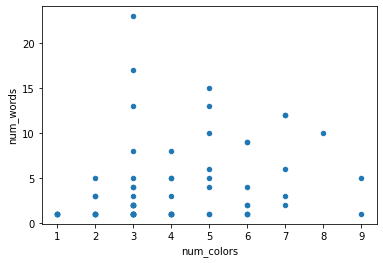

In [50]:
# Step 3 Visualize
data.plot.scatter('num_colors', 'num_words')